In [1]:
import glob #to read the files
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from scipy.interpolate import interp1d
import os.path 
from tabulate import tabulate #to export in table format
from scipy.optimize import fmin

In [2]:
kernel = [0.5 * (RBF(length_scale=5, length_scale_bounds=(1, 10)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5,0.5)))]

In [3]:
len(kernel)

1

In [4]:
X_ = np.linspace(-20, 50, 70 + 1)
wave = np.linspace(2000, 9200, 720 + 1)
list_data = [[]for y in range(0,721)]

In [5]:
sn_names = glob.glob("/home/joao/Documentos/templates/data_ext/SN2000cx*.dat")

In [6]:
len(sn_names)

17

In [7]:
for i in range(0,len(sn_names)):

    y = []
    z = []

    file = open(sn_names[i])
    lines = file.readlines()
    file.close()

    for line in lines:
        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        y.append(co[0])
        z.append(co[1])


    #y = np.array(y, dtype=float)
    z = np.array(z, dtype=float)

    timetemp = lines[0]
    timetemp = timetemp[:-1]
    timetemp = float(timetemp[1:])

    f = max(z)

    for jj in range(0,len(z)):

        list_data[jj].append([timetemp,z[jj]])


In [8]:
jj=400

In [9]:
wave[jj]

6000.0

In [10]:
yy = []
zz = []
yyscatter = []

xmin = np.linspace(-10, 10, 11)
option = []
score = []

for k in range(0,len(list_data[jj])):

    yy.append([list_data[jj][k][0]])
    yyscatter.append(list_data[jj][k][0])
    zz.append(list_data[jj][k][1])

ff = max(zz)
#print(ff)
zz = zz/ff

for i in range(0,len(kernel)):
    
    print(i)
    val = []
    
    gp = GaussianProcessRegressor(kernel=kernel[i], alpha=0).fit(yy, zz)
    
    y_mean,y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
    val_score = gp.score(yy, zz)
    
    interpolation = interp1d(X_, y_mean, fill_value="extrapolate")
    
    for j in range(0,len(xmin)):

        xval = fmin(interpolation, xmin[j], disp=False)
        
        
        if -10 < xval[0] < 10:
            
            val.append(xval[0])
            
            
          
    if len(val) == 0:
        
        score.append(val_score)
        option.append(i)
        
    

0


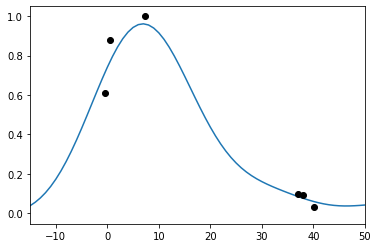

In [11]:
plt.plot(X_,y_mean)
plt.plot(yy, zz,'ko')
plt.xlim(-15, 50)
plt.show()

In [12]:
score

[0.9839774508947348]

In [13]:
option

[0]

In [14]:
max(score)

0.9839774508947348